In [4]:
import pandas as pd
import os
import numpy as np
import ast
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx
from scipy import stats


os.chdir("/Users/Daniela/Documents/EPFLMasters/Winter2/Ada/AdaRepo/ADA_wikispeedia")
print(os.getcwd())

SAVE_FOLDER = "data_processed"

/Users/Daniela/Documents/EPFLMasters/Winter2/Ada/AdaRepo/ADA_wikispeedia


In [5]:
paths_finished_df = pd.read_csv("data/wikispeedia_paths-and-graph/paths_finished.tsv", names=["hashedIpAddress", "timestamp", "durationInSec", "path", "rating"], sep="\t", skiprows=16)
paths_finished_df.head(3)

,hashedIpAddress,timestamp,durationInSec,path,rating
0,6a3701d319fc3754,1297740409,166,14th_century;15th_century;16th_century;Pacific...,NaN
1,3824310e536af032,1344753412,88,14th_century;Europe;Africa;Atlantic_slave_trad...,3.0
2,415612e93584d30e,1349298640,138,14th_century;Niger;Nigeria;British_Empire;Slav...,NaN


In [6]:

#hashedIpAddress   timestamp   durationInSec   path   target   type
paths_unfinished_df = pd.read_csv("data/wikispeedia_paths-and-graph/paths_unfinished.tsv", names=["hashedIpAddress", "timestamp", "durationInSec", "path", "target", "type"], sep="\t", skiprows=17)
paths_unfinished_df.head(3)


,hashedIpAddress,timestamp,durationInSec,path,target,type
0,2426091a53125110,1297054935,1804,Obi-Wan_Kenobi,Microsoft,timeout
1,26141fd878806294,1297055651,1805,Julius_Caesar,Caracas,timeout
2,2b015fb8181c48f2,1297090819,1818,Malawi;Democracy;Alexander_the_Great,First_Crusade,timeout


## MODIFYING DATA FRAMES FOR EASIER USAGE


In [7]:
paths_finished_df["path"] = paths_finished_df["path"].apply(lambda p : p.split(";"))
paths_finished_df.head(3)


,hashedIpAddress,timestamp,durationInSec,path,rating
0,6a3701d319fc3754,1297740409,166,"[14th_century, 15th_century, 16th_century, Pac...",NaN
1,3824310e536af032,1344753412,88,"[14th_century, Europe, Africa, Atlantic_slave_...",3.0
2,415612e93584d30e,1349298640,138,"[14th_century, Niger, Nigeria, British_Empire,...",NaN


In [8]:
backtracked_finished = paths_finished_df[paths_finished_df["path"].apply(lambda path: "<" in path)]
print(f"The number of FINISHED paths where there was a backtrack is: {len(backtracked_finished)} out of {len(paths_finished_df)},, about {(len(backtracked_finished)/len(paths_finished_df) * 100):.2f}%")

The number of FINISHED paths where there was a backtrack is: 8995 out of 51318,, about 17.53%


In [9]:
paths_unfinished_df["path"] = paths_unfinished_df["path"].apply(lambda p : p.split(";"))
paths_unfinished_df.head(3)

,hashedIpAddress,timestamp,durationInSec,path,target,type
0,2426091a53125110,1297054935,1804,[Obi-Wan_Kenobi],Microsoft,timeout
1,26141fd878806294,1297055651,1805,[Julius_Caesar],Caracas,timeout
2,2b015fb8181c48f2,1297090819,1818,"[Malawi, Democracy, Alexander_the_Great]",First_Crusade,timeout


In [10]:
backtracked_unfinished = paths_unfinished_df[paths_unfinished_df["path"].apply(lambda path: "<" in path)]
print(f"The number of UNFINISHED paths where there was a backtrack is: {len(backtracked_unfinished)} out of {len(paths_unfinished_df)}, about {(len(backtracked_unfinished)/len(paths_unfinished_df) * 100):.2f}%")


The number of UNFINISHED paths where there was a backtrack is: 5201 out of 24875, about 20.91%


,finished,unfinished,total_paths,backtracked_percentage_finished,backtracked_percentage_unfinished
0,51318.0,24875.0,76193.0,17.527963,20.908543


,Path Type,Number of Paths
0,Finished,51318
1,Unfinished,24875


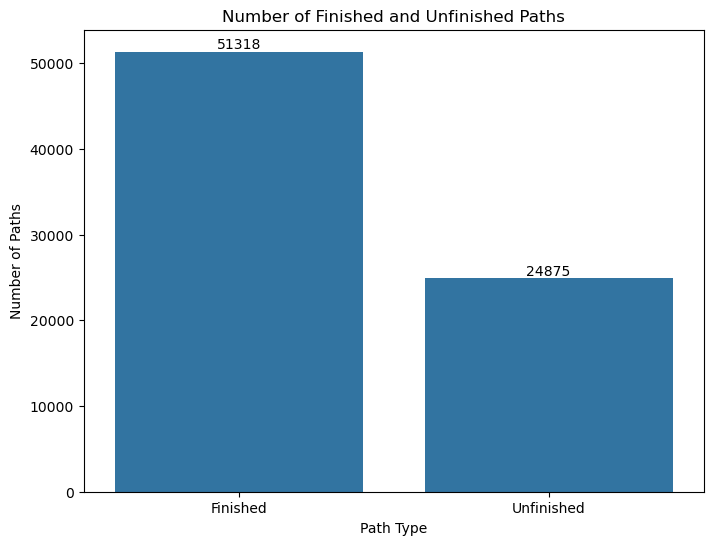

,Path Type,Percentage of Paths
0,Finished,17.527963
1,Unifinished,20.908543


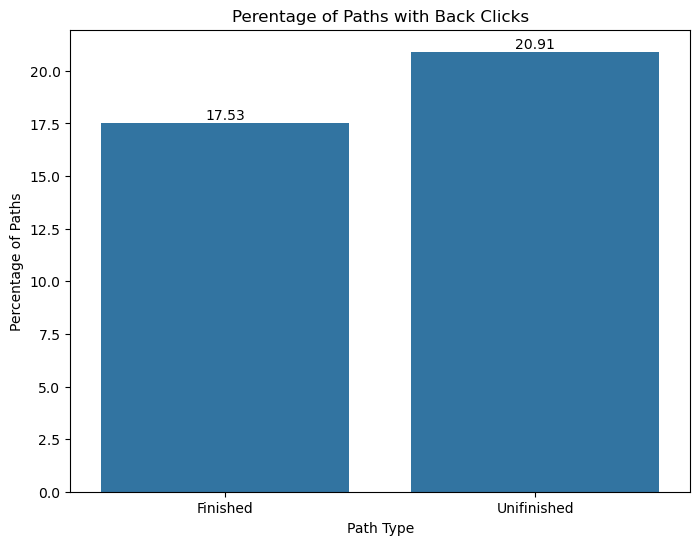

In [11]:
finished_unfinished_summary_df = pd.DataFrame(columns=["finished", "unfinished", "total_paths", "backtracked_percentage_finished", "backtracked_percentage_unfinished"])
# finished_unfinished_summary_df["finished"] = len(paths_finished_df)
# finished_unfinished_summary_df["unfinished"] = len(paths_unfinished_df)
# finished_unfinished_summary_df["total_paths"] = 
finished_paths = len(paths_finished_df)

# Number of unfinished paths
unfinished_paths = len(paths_unfinished_df)

# Total number of paths
total_paths = finished_paths + unfinished_paths

# Percentage of paths with a backtrack for finished paths
backtrack_percentage_finished = (len(backtracked_finished) / finished_paths)*100 if finished_paths > 0 else 0

# Percentage of paths with a backtrack for unfinished paths
backtrack_percentage_unfinished = (len(backtracked_unfinished) / unfinished_paths)*100 if unfinished_paths > 0 else 0

# Add these values to the summary DataFrame
finished_unfinished_summary_df.loc[0] = [finished_paths, unfinished_paths, total_paths, backtrack_percentage_finished, backtrack_percentage_unfinished]
display(finished_unfinished_summary_df)

bar_paths_data = pd.DataFrame({
    'Path Type': ['Finished', 'Unfinished'],
    'Number of Paths': [finished_paths, unfinished_paths]
})
display(bar_paths_data)

# Create bar plot
plt.figure(figsize=(8, 6))
axs =sns.barplot(x='Path Type', y='Number of Paths', data=bar_paths_data)
plt.title('Number of Finished and Unfinished Paths')
plt.xlabel('Path Type')
plt.ylabel('Number of Paths')
for bar in axs.containers:
  axs.bar_label(bar, fmt='%.0f', label_type='edge')
plt.show()

bar_per_backtracked = pd.DataFrame({
  'Path Type': ['Finished', 'Unifinished'],
  'Percentage of Paths':[backtrack_percentage_finished, backtrack_percentage_unfinished]
})

display(bar_per_backtracked)
plt.figure(figsize=(8, 6))
axs = sns.barplot(x='Path Type', y='Percentage of Paths', data=bar_per_backtracked)
plt.title('Perentage of Paths with Back Clicks')
plt.xlabel('Path Type')
plt.ylabel('Percentage of Paths')
for bar in axs.containers:
  axs.bar_label(bar, fmt='%.2f', label_type='edge')
plt.show()


Let's replace the backtrack symbol with the page name it went back to

In [12]:
def replace_backClicks(path_arr):
  #look into the path array and if you find a < character at position n, you replace it with the n-2 page.
  for idx, n in enumerate(path_arr):
    if n == "<" and idx >= 2:
      path_arr[idx] = path_arr[idx-2]

  return path_arr



In [13]:
paths_finished_df["path"] = paths_finished_df["path"].apply(replace_backClicks)
backtracked_finished = paths_finished_df[paths_finished_df["path"].apply(lambda path: "<" in path)]
len(backtracked_finished)


0

In [14]:
paths_unfinished_df["path"] = paths_unfinished_df["path"].apply(replace_backClicks)
backtracked_unfinished = paths_unfinished_df[paths_unfinished_df["path"].apply(lambda path: "<" in path)]
len(backtracked_unfinished)

0

In [15]:
#add column for path length of finished paths
paths_finished_df["path_length"] = paths_finished_df["path"].apply(lambda p: len(p))
paths_finished_df.head(10)



,hashedIpAddress,timestamp,durationInSec,path,rating,path_length
0,6a3701d319fc3754,1297740409,166,"[14th_century, 15th_century, 16th_century, Pac...",NaN,9
1,3824310e536af032,1344753412,88,"[14th_century, Europe, Africa, Atlantic_slave_...",3.0,5
2,415612e93584d30e,1349298640,138,"[14th_century, Niger, Nigeria, British_Empire,...",NaN,8
3,64dd5cd342e3780c,1265613925,37,"[14th_century, Renaissance, Ancient_Greece, Gr...",NaN,4
4,015245d773376aab,1366730828,175,"[14th_century, Italy, Roman_Catholic_Church, H...",3.0,7
5,5295bca242be81fe,1372890414,110,"[14th_century, Europe, North_America, United_S...",NaN,6
6,36dabfa133b20e3c,1249525912,112,"[14th_century, China, Gunpowder, Fire]",2.0,4
7,20418ff4797f96be,1229188046,139,"[14th_century, Time, Isaac_Newton, Light, Colo...",1.0,6
8,08888b1b428dd90e,1232241510,74,"[14th_century, Time, Light, Rainbow]",3.0,4
9,08888b1b428dd90e,1232241601,167,"[14th_century, 15th_century, Plato, Nature, Ul...",NaN,7


In [16]:
#add a soure and target column to the df as rn the source is only in the path
paths_finished_df["source"] = paths_finished_df["path"].apply(lambda p: p[0])
paths_finished_df.head(3)
paths_finished_df["target"] = paths_finished_df["path"].apply(lambda p: p[-1])
paths_finished_df.head(3)


,hashedIpAddress,timestamp,durationInSec,path,rating,path_length,source,target
0,6a3701d319fc3754,1297740409,166,"[14th_century, 15th_century, 16th_century, Pac...",NaN,9,14th_century,African_slave_trade
1,3824310e536af032,1344753412,88,"[14th_century, Europe, Africa, Atlantic_slave_...",3.0,5,14th_century,African_slave_trade
2,415612e93584d30e,1349298640,138,"[14th_century, Niger, Nigeria, British_Empire,...",NaN,8,14th_century,African_slave_trade


In [17]:
paths_unfinished_df["path_length"] = paths_unfinished_df["path"].apply(lambda p: len(p))
paths_unfinished_df.head(10)

,hashedIpAddress,timestamp,durationInSec,path,target,type,path_length
0,2426091a53125110,1297054935,1804,[Obi-Wan_Kenobi],Microsoft,timeout,1
1,26141fd878806294,1297055651,1805,[Julius_Caesar],Caracas,timeout,1
2,2b015fb8181c48f2,1297090819,1818,"[Malawi, Democracy, Alexander_the_Great]",First_Crusade,timeout,3
3,53a53bc244e08a6a,1297094761,49,[Paraguay],Mount_St._Helens,restart,1
4,53a53bc244e08a6a,1297099105,1808,"[Paraguay, Bolivia]",Mount_St._Helens,timeout,2
5,131600803df4895e,1297100557,2009,"[Agriculture, History_of_the_world, China, Yan...",Grand_Canal_of_China,timeout,4
6,486bb79910fe9dd2,1297101660,1932,"[Mind, Christianity, Europe, Renaissance, Anci...",Scouting,timeout,7
7,6d136e371e42474f,1297102070,175,"[4-2-0, United_States, Agriculture, Sugar, Aus...",Cane_Toad,restart,5
8,6d136e371e42474f,1297102100,19,[Logic],Moon_landing,restart,1
9,6d136e371e42474f,1297104110,2006,"[Logic, Computer_science, Science, Physical_sc...",Moon_landing,timeout,9


In [18]:
#add a soure column to the df as rn the source is only in the path
paths_unfinished_df["source"] = paths_unfinished_df["path"].apply(lambda p: p[0])
paths_unfinished_df.head(3)


,hashedIpAddress,timestamp,durationInSec,path,target,type,path_length,source
0,2426091a53125110,1297054935,1804,[Obi-Wan_Kenobi],Microsoft,timeout,1,Obi-Wan_Kenobi
1,26141fd878806294,1297055651,1805,[Julius_Caesar],Caracas,timeout,1,Julius_Caesar
2,2b015fb8181c48f2,1297090819,1818,"[Malawi, Democracy, Alexander_the_Great]",First_Crusade,timeout,3,Malawi


In [19]:
#there are some paths that timed out without the player navigating, so path_length 1 and type timeout
print(f"The number of unfinished paths that timed out without the player making a move are {len(paths_unfinished_df[(paths_unfinished_df['type'] == 'timeout') & (paths_unfinished_df['path_length'] == 1)])}")


The number of unfinished paths that timed out without the player making a move are 2009


In [20]:
#we drop them...
paths_unfinished_df = paths_unfinished_df[~((paths_unfinished_df["type"] == "timeout") & (paths_unfinished_df["path_length"] == 1))]


,finished,unfinished,total_paths,backtracked_percentage_finished,backtracked_percentage_unfinished
0,51318.0,22866.0,74184.0,0.0,0.0


,Path Type,Number of Paths
0,Finished,51318
1,Unfinished,22866


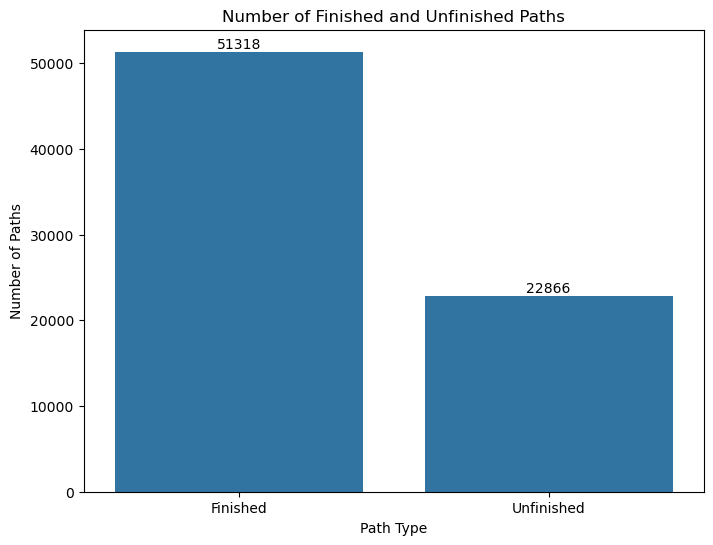

In [21]:
#AFTER CLEANUP
finished_unfinished_summary_df = pd.DataFrame(columns=["finished", "unfinished", "total_paths", "backtracked_percentage_finished", "backtracked_percentage_unfinished"])
# finished_unfinished_summary_df["finished"] = len(paths_finished_df)
# finished_unfinished_summary_df["unfinished"] = len(paths_unfinished_df)
# finished_unfinished_summary_df["total_paths"] = 
finished_paths = len(paths_finished_df)

# Number of unfinished paths
unfinished_paths = len(paths_unfinished_df)

# Total number of paths
total_paths = finished_paths + unfinished_paths

# Percentage of paths with a backtrack for finished paths
backtrack_percentage_finished = (len(backtracked_finished) / finished_paths)*100 if finished_paths > 0 else 0

# Percentage of paths with a backtrack for unfinished paths
backtrack_percentage_unfinished = (len(backtracked_unfinished) / unfinished_paths)*100 if unfinished_paths > 0 else 0

# Add these values to the summary DataFrame
finished_unfinished_summary_df.loc[0] = [finished_paths, unfinished_paths, total_paths, backtrack_percentage_finished, backtrack_percentage_unfinished]
display(finished_unfinished_summary_df)

bar_paths_data = pd.DataFrame({
    'Path Type': ['Finished', 'Unfinished'],
    'Number of Paths': [finished_paths, unfinished_paths]
})
display(bar_paths_data)

# Create bar plot
plt.figure(figsize=(8, 6))
axs = sns.barplot(x='Path Type', y='Number of Paths', data=bar_paths_data)
plt.title('Number of Finished and Unfinished Paths')
plt.xlabel('Path Type')
plt.ylabel('Number of Paths')
for bar in axs.containers:
  axs.bar_label(bar, fmt='%.0f', label_type='edge')
plt.show()




## CONECTIVITY GRAPH AND PATHS

In [25]:
links_df = pd.read_csv("data_processed/links_processed.csv")
links_df.head(3)

links_G = nx.from_pandas_edgelist(links_df, create_using=nx.DiGraph(), source="link_source", target="link_target")

#gt the adjacency matrix
adj_matrix = nx.adjacency_matrix(links_G)
adj_matrix





<4592x4592 sparse array of type '<class 'numpy.int64'>'
	with 119882 stored elements in Compressed Sparse Row format>

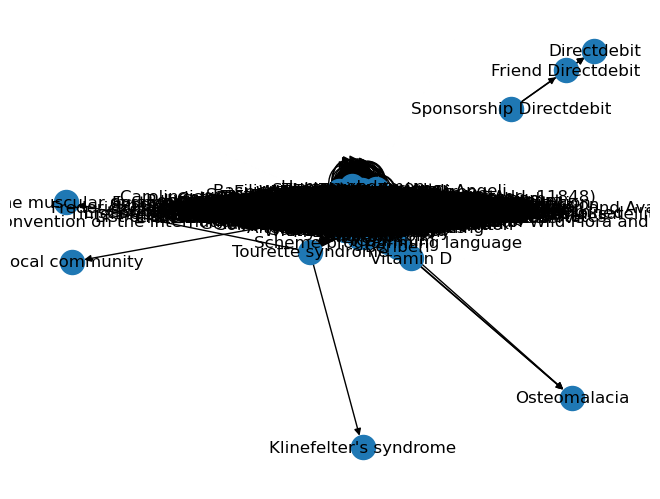

In [26]:
nx.draw(links_G, with_labels=True)
plt.show()

# LOOKING AT CENTRALITY

In [29]:
# considering in edges + out edges divided by the max degree in the graph (n-1)
centrality = nx.degree_centrality(links_G)
#find the top 10 central nodes
most_connected_nodes = sorted(centrality, key=centrality.get, reverse=True)[:10]
print("The most central nodes in our graph are:")
most_connected_nodes




the most central nodes in our graph are:


['United States',
 'United Kingdom',
 'Europe',
 'France',
 'England',
 'Germany',
 'World War II',
 'English language',
 'India',
 'London']